In [1]:
from bbox.metrics import iou_3d
from kiss_icp.tools.utils_class import BoundingBox3D
from typing import List
from scipy.spatial.transform import Rotation as R
import numpy as np
import pandas as pd

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# annotations_and_detections = np.load("../results/annotations_and_detections/000/000016.npy", allow_pickle='TRUE').item()


In [3]:
# evaluation = {}
# for frame_id in annotations_and_detections:
#     frame = annotations_and_detections[frame_id]

#     for track_uuid, anno_and_det in frame.items():

#         annotation = anno_and_det[1]
#         detection = anno_and_det[0]
#         if track_uuid == '2f999c71-bfc0-405e-a620-574545ffb657':
#             gt_x = annotation.dst_SE3_object.translation[0]
#             gt_y = annotation.dst_SE3_object.translation[1]
#             gt_z = annotation.dst_SE3_object.translation[2]
            
#             gt_anno_r = R.from_matrix(annotation.dst_SE3_object.rotation)
#             gt_yaw = gt_anno_r.as_euler('zxy', degrees=True)[0]
            
#             gt_l = annotation.length_m
#             gt_w = annotation.width_m
#             gt_h = annotation.height_m
#             gt_np = np.array([[gt_x, gt_y, gt_z, gt_l, gt_w, gt_h, gt_yaw]])

#             ############################################
#             det_used = detection.s_pose_visuals[frame_id]
#             det_x = det_used.x
#             det_y = det_used.y
#             det_z = det_used.z
            
#             det_r = R.from_matrix(det_used.rot)
#             det_yaw = det_r.as_euler('zxy', degrees=True)[0]

#             det_l = det_used.length
#             det_w = det_used.width
#             det_h = det_used.height
#             det_np = np.array([[det_x, det_y, det_z, det_l, det_w, det_h, det_yaw]])
#             # if not yaw < -170 or yaw > 170:
#                 # print("frame_id", frame_id)
#                 # print("det_np", det_np)
#                 # print("gt_np", gt_np)
#             if frame_id == 0:
#                 gt_nps = gt_np
#                 det_nps = det_np
#             else:
#                 gt_nps = np.vstack((gt_nps, gt_np))
#                 det_nps = np.vstack((det_nps, det_np))
# np.savetxt("gt_nps.txt", gt_nps)
# np.savetxt("det_nps.txt", det_nps)

In [4]:
opt_nps_vanilla = np.loadtxt("opt_nps_vanilla.txt")
opt_nps_vanilla_motion_prior = np.loadtxt("opt_nps_vanilla_motion_prior.txt")
opt_nps_accu = np.loadtxt("opt_nps_accu.txt")
gt_nps = np.loadtxt("gt_nps.txt")
det_nps = np.loadtxt("det_nps.txt")

-0.11079376570583539
-0.4702466821360239


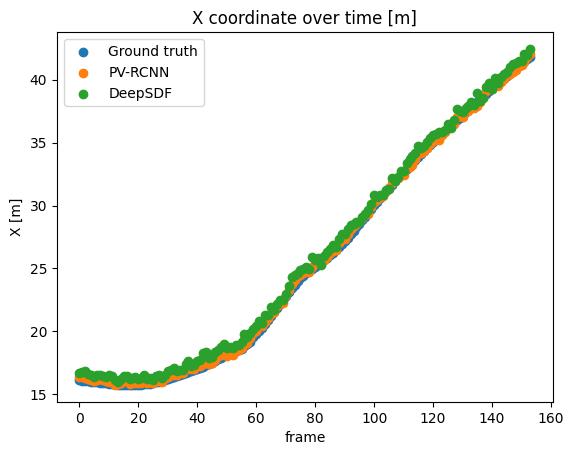

In [118]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, det_nps.shape[0], 1)

plt.scatter(t, gt_nps[:, 0], label="Ground truth")
plt.scatter(t, det_nps[:, 0], label="PV-RCNN")
plt.scatter(t, opt_nps_vanilla[:, 0], label="DeepSDF")
# plt.scatter(t, opt_nps_accu[:, 0], label="DeepSDF with Accumulation")
# plt.scatter(t, opt_nps_vanilla_motion_prior[:, 0], label="DeepSDF with motion prior")
print(np.mean(gt_nps[:, 0] - det_nps[:, 0]))
print(np.mean(gt_nps[:, 0] - opt_nps_vanilla[:, 0]))
plt.legend()
plt.xlabel('frame')
plt.ylabel('X [m]')
 
# displaying the title
plt.title("X coordinate over time [m]")
plt.show()

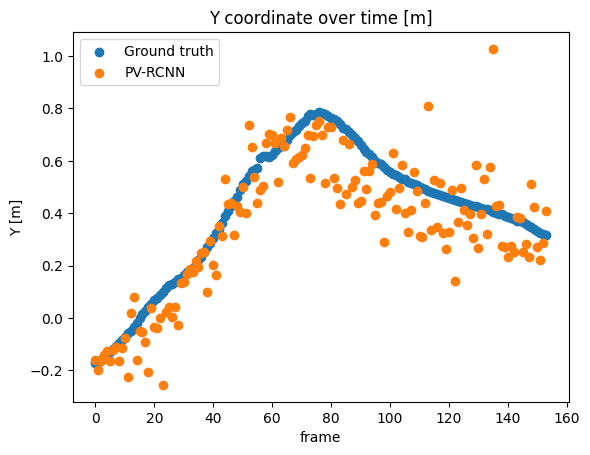

In [117]:
plt.scatter(t, gt_nps[:, 1], label="Ground truth")
plt.scatter(t, det_nps[:, 1], label="PV-RCNN")
plt.scatter(t, opt_nps_vanilla[:, 1], label="DeepSDF")
# plt.scatter(t, opt_nps_accu[:, 1], label="DeepSDF with Accumulation")
# plt.scatter(t, opt_nps_vanilla_motion_prior[:, 1], label="DeepSDF with motion prior")

plt.legend()
plt.xlabel('frame')
plt.ylabel('Y [m]')
 
# displaying the title
plt.title("Y coordinate over time [m]")
plt.show()

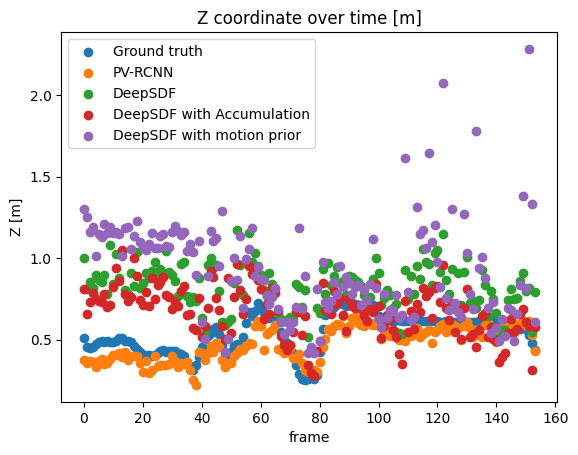

In [98]:
plt.scatter(t, gt_nps[:, 2], label="Ground truth")
plt.scatter(t, det_nps[:, 2], label="PV-RCNN")
plt.scatter(t, opt_nps_vanilla[:, 2], label="DeepSDF")
plt.scatter(t, opt_nps_accu[:, 2], label="DeepSDF with Accumulation")
plt.scatter(t, opt_nps_vanilla_motion_prior[:, 2], label="DeepSDF with motion prior")

plt.legend()
plt.xlabel('frame')
plt.ylabel('Z [m]')
 
# displaying the title
plt.title("Z coordinate over time [m]")
plt.show()

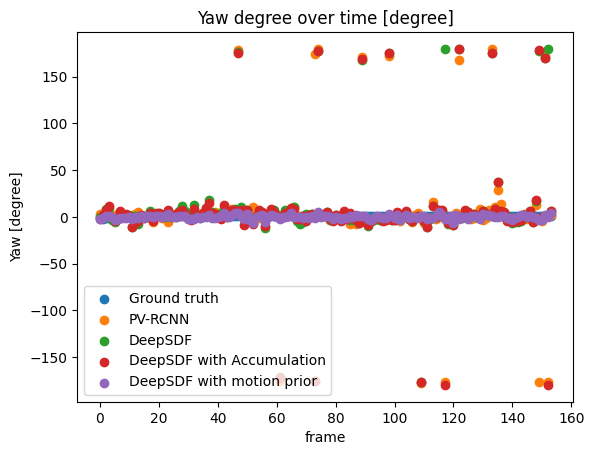

In [99]:
plt.scatter(t, gt_nps[:, 6], label="Ground truth")
plt.scatter(t, det_nps[:, 6], label="PV-RCNN")
plt.scatter(t, opt_nps_vanilla[:, 3], label="DeepSDF")
plt.scatter(t, opt_nps_accu[:, 3], label="DeepSDF with Accumulation")
plt.scatter(t, opt_nps_vanilla_motion_prior[:, 3], label="DeepSDF with motion prior")

plt.legend()
plt.xlabel('frame')
plt.ylabel('Yaw [degree]')
 
# displaying the title
plt.title("Yaw degree over time [degree]")
plt.show()

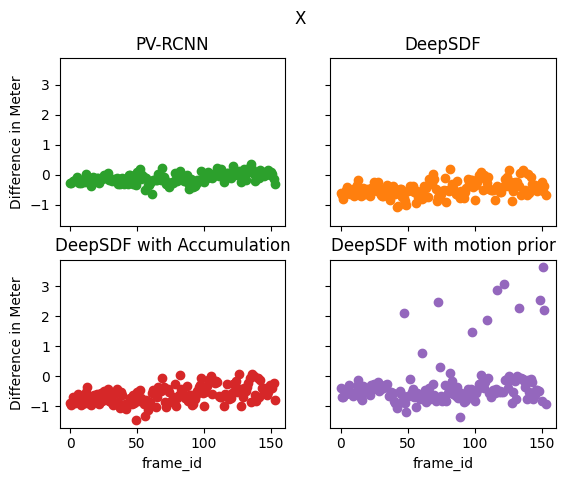

In [108]:
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].scatter(t, gt_nps[:, 0] - det_nps[:, 0], color="tab:green")
axs[0, 0].set_title('PV-RCNN')
axs[0, 1].scatter(t, gt_nps[:, 0] - opt_nps_vanilla[:, 0], color="tab:orange")
axs[0, 1].set_title('DeepSDF')
axs[1, 0].scatter(t, gt_nps[:, 0] - opt_nps_accu[:, 0], color="tab:red")
axs[1, 0].set_title('DeepSDF with Accumulation')
axs[1, 1].scatter(t, gt_nps[:, 0] - opt_nps_vanilla_motion_prior[:, 0], color="tab:purple")
axs[1, 1].set_title('DeepSDF with motion prior')

for ax in axs.flat:
    ax.set(xlabel='frame_id', ylabel='Difference in Meter')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.suptitle('X') 
plt.show()

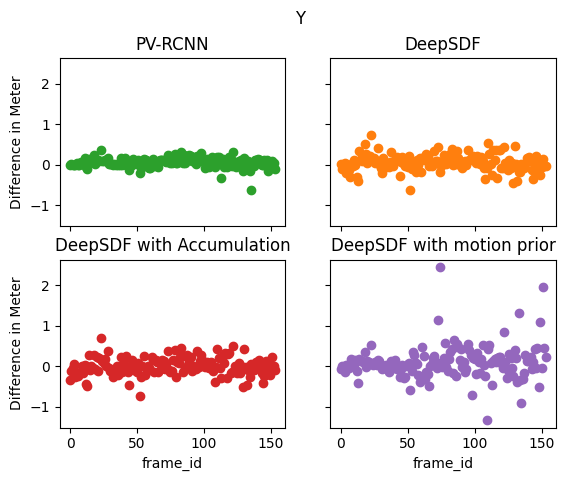

In [109]:
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].scatter(t, gt_nps[:, 1] - det_nps[:, 1] , color="tab:green")
axs[0, 0].set_title('PV-RCNN')
axs[0, 1].scatter(t, gt_nps[:, 1] - opt_nps_vanilla[:, 1], color="tab:orange")
axs[0, 1].set_title('DeepSDF')
axs[1, 0].scatter(t, gt_nps[:, 1] - opt_nps_accu[:, 1], color="tab:red")
axs[1, 0].set_title('DeepSDF with Accumulation')
axs[1, 1].scatter(t, gt_nps[:, 1] - opt_nps_vanilla_motion_prior[:, 1], color="tab:purple")
axs[1, 1].set_title('DeepSDF with motion prior')

for ax in axs.flat:
    ax.set(xlabel='frame_id', ylabel='Difference in Meter')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.suptitle('Y') 
plt.show()

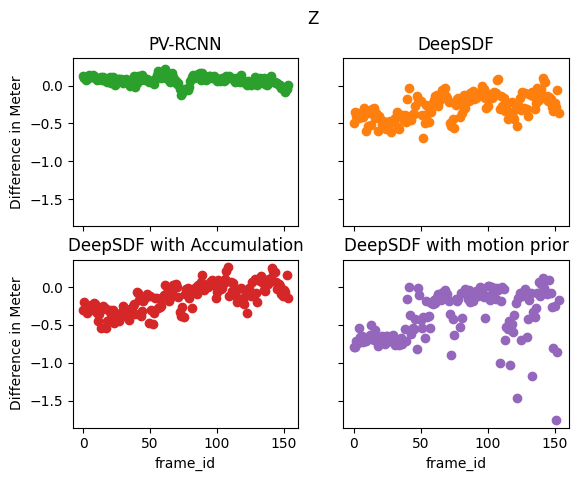

In [112]:
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].scatter(t, gt_nps[:, 2] - det_nps[:, 2], color="tab:green")
axs[0, 0].set_title('PV-RCNN')
axs[0, 1].scatter(t, gt_nps[:, 2] - opt_nps_vanilla[:, 2], color="tab:orange")
axs[0, 1].set_title('DeepSDF')
axs[1, 0].scatter(t, gt_nps[:, 2] - opt_nps_accu[:, 2], color="tab:red")
axs[1, 0].set_title('DeepSDF with Accumulation')
axs[1, 1].scatter(t, gt_nps[:, 2] - opt_nps_vanilla_motion_prior[:, 2], color="tab:purple")
axs[1, 1].set_title('DeepSDF with motion prior')

for ax in axs.flat:
    ax.set(xlabel='frame_id', ylabel='Difference in Meter')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.suptitle('Z') 
plt.show()

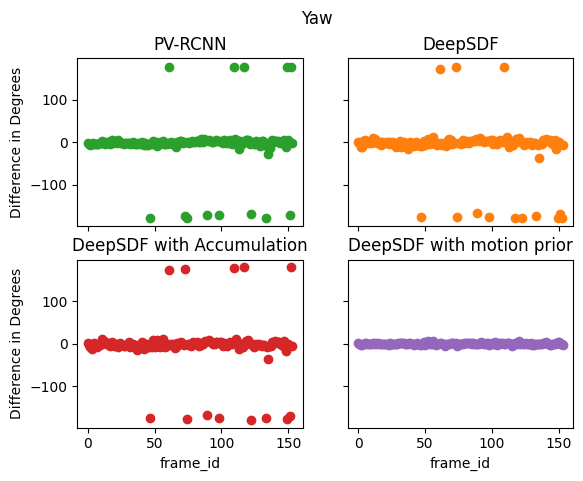

In [111]:
fig, axs = plt.subplots(2, 2, sharey=True)
axs[0, 0].scatter(t, gt_nps[:, 6] - det_nps[:, 6] , color="tab:green")
axs[0, 0].set_title('PV-RCNN')
axs[0, 1].scatter(t, gt_nps[:, 6] - opt_nps_vanilla[:, 3], color="tab:orange")
axs[0, 1].set_title('DeepSDF')
axs[1, 0].scatter(t, gt_nps[:, 6] - opt_nps_accu[:, 3], color="tab:red")
axs[1, 0].set_title('DeepSDF with Accumulation')
axs[1, 1].scatter(t, gt_nps[:, 6] - opt_nps_vanilla_motion_prior[:, 3], color="tab:purple")
axs[1, 1].set_title('DeepSDF with motion prior')

for ax in axs.flat:
    ax.set(xlabel='frame_id', ylabel='Difference in Degrees')
    
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.suptitle('Yaw') 
plt.show() # can not see